In [2]:
import numpy as np, matplotlib.pyplot as plt

## COMPUTATIONAL PHYSICS, M. NEWMAN, CHAPTER 10, EXERCISES     

### Exercise 10.1 

**掷骰子**

1. 写程序产生并打印出两个1到6之间到随机数，模拟掷两个骰子.
  
2. 修改程序模拟掷两个骰子一百万次，统计出现双6的次数. 除以百万获得双6出现的比例. 你的答案应该接近
  $\frac{1}{36}$.

In [4]:
N = 1000000
dice2 = np.random.choice([1,2,3,4,5,6],size=(2,N))
np.sum(np.sum(dice2,axis=0)==12)/N,1/36

(0.027589, 0.027777777777777776)

### Exercise 10.2 

**放射性衰变链**

 本练习是例10.1放射性衰变模拟的高级版.

放射性同位素$^{213}$Bi通过两个不同的路径衰变到稳定元素$^{209}$Bi，两个路径的概率和半衰期为：

<img src="decaychain.png" width=200>

(技术上来说, $^{209}$Bi 并非真正稳定, 但是它的半衰期超过$10^{19}$年，是宇宙年龄的10亿倍，所以也可以算作稳定.)

初始样本由$10\,000$个$^{213}$Bi原子组成，如例10.1那样模拟原子的衰变, 时间步长为
$\delta t=1\,$s，每一步做如下操作:

  
1. 依次对每一个$^{209}$Pb原子，用概率决定它是否衰变. (概率可以用公式$p(t)=1-2^{-t/\tau}$计算.) 统计衰变的数目，将其从
  $^{209}$Pb总数中减除, 将其加入$^{209}$Bi的原子数.
  
  
2. 现在对$^{209}$Tl原子做同样的操作, 衰变的原子数从$^{209}$Tl原子数中扣除，并加到$^{209}$Pb原子数中.
 

3. 对$^{213}$Bi原子形势更复杂一些: 当一个$^{213}$Bi衰变，你需要依概率决定它的衰变路径. 统计每个衰变路径衰变的原子数并加到相应的原子中.

注意你需要自下而上的完成衰变路径，而不是从上到下, 以避免不小心使得同一个原子在同一步衰变两次.

跟踪4种同位素的原子数在$20\,000$的时间内的变化，在一副图中画出这四种同位素随时间的变化.

In [5]:
def p(t,tau):
    return 1-2**(-t/tau)
Pb_tau = 3.3*60   # Half time of Pb atom
Nt = 10
h = 1.0
NPb = 10
NBi = 10
Pbpoints = []
Bipoints = []
for t in range(Nt):
    Pbpoints.append(NPb)
    Bipoints.append(NBi)
    #计算衰变的原子数
    decay = 0
    for i in range(NPb):
        if np.random.random() < p(t,Pb_tau):
            decay += 1
    NPb -= decay
    NBi += decay

In [6]:
def decay(Nf, Ne, Nt, tau):
    Nfpoints = [Nf]
    Nepoints = [Ne]
    for t in range(Nt):
        Ndecay = 0
        for i in range(Nf):
            if np.random.random() < p(t,tau):
                Ndecay += 1
        Nf -= Ndecay
        Ne += Ndecay
        Nfpoints.append(Nf)
        Nepoints.append(Ne)
    return Nfpoints, Nepoints

### Exercise 10.3 

**布朗运动**

布朗运动是一种粒子运动， 例如气体中的烟或者粉尘粒子，当受到气体分子的自由碰撞后产生的运动.

在二维空间中简单模拟这样一个粒子的运动.

粒子被限制在一个$L\times L$的方框中, 所以它的位置可以用两个整数$i,j = 0\ldots L-1$. 它的初始位置是栅格的中间位置. 在每一步模拟中, 随机选择一个方向---上，下，左或右---将粒子向这个方向移动一步. 这个过程称为随机行走. 粒子不能走出方框---如果到达方框边缘，则需要重新选择运动方向. 

写程序进行一百万步的模拟, 方框边长$L=101$, 做一个粒子位置的动画. (我们选择方框的边长为奇数以使其中有一个格子刚好位于中心.)

注意: *visual* 模块和*random*模块合作不是很好, 但是先导入*visual*中的函数, 之后再导入*random*中的函数，就可以避免出现问题.

### Exercise 10.4 

**放射性衰变**

重新做例10.1的计算, 但是这次采用后面章节描述的更快的方法. 使用变换法, 从方程(10.5)的非均匀分布产生1000个随机数，代表1000个$^{208}$Tl原子的衰变次数(其半衰期是3.053分). 之后画图显示没有衰变的原子数随时间的变化, 即表示选择的衰变时间大于$t$的原子的数目.

提示: 你可能会用到numpy模块中的sort函数，它可以让数组元素升序排列. 即*b=sort(a)*返回一个新的数组*b*, 包含的数值个数与*a*一样, 但是顺序是从小到大排列的.

### Exercise 10.5 

1. 写程序用10.2节的"hit-or-miss"蒙特卡洛方法计算方程(10.22)的积分，取$10\,000$个点，并估计误差.
 
2. 现在用平均值法估计积分，也取$10\,000$个点并估计误差.

你会发现平均值法的误差要小一些.

### Exercise 10.6 

按下面的步骤构建平均值法优于或者不次于"hit-or-miss"方法的证据.

1. 对于形如(10.27)的积分，其中$f(x)\ge0$这积分区域内处处成立，说明方程(10.23)可以被写作
$$
I \simeq (b-a) H\langle{s}\rangle,
$$
其中$H$是包含被积函数的矩形的高度(所以矩形的面积是$A=(b-a)H$), $\langle{s}\rangle$变量$s_i$的平均值, 如果蒙特卡洛模拟中的第$i$个点击中，则$s_i=1$ (它落在曲线$f(x)$的下面), 如果没有击中则$s_i=0$. 因而论证在公式(10.32)中的函数$f)的方差满足$var(f) \le H^2var(s)$的情况下，投点法在精度上不可能好于平均值法.

2. 说明单变量$s_i$的方差是 $var(s) =
  p(1-p)$, 其中$p=I/A$如10.2节的定义. 进一步说明
  $p=\langle{f}\rangle/H$ 和 $H^2var(s) = \langle{f}\rangle(H-\langle{f}\rangle)$，如果$\langle{f(f-H)}\rangle\le0$，那么投点法不可能更准确。 假设$f(x)$的值不会落于0到$H$这个范围之外，证明最后这个条件始终是真的. 

投点法可以通过加一个足够大的常数来拓展到函数$f(x)$的值非正的情况，计算积分获得积分值后再在结果中扣除常数. 这个不需要证明，因为$f$的方差不受所加常数的影响，因此对任何函数的蒙特卡洛积分，平均值法都是更精确的方法.

### Exercise 10.7 

**超球体的体积**

这个练习需要用蒙特卡洛方法估计一个半径为单位长度的10维球体的体积.
考虑二维情况下的等价问题, 单位圆的面积: 
<img src="circle.png" width=300>

上面阴影部分的圆的面积由下面的积分给出
$$
I = \iint_{-1}^{+1} f(x,y) d  x\, d  y,
$$
其中圆内$f(x,y)=1$，圆外$f(x,y)=0$. 
换句话说,
$$
f(x,y) = \biggl\lbrace\begin{array}{ll}
           1 &\qquad\mbox{if $x^2+y^2\le1$,} \\
           0 &\qquad\mbox{otherwise.}
         \end{array}
$$
所以如果我们不知道圆的面积，我们可以用蒙特卡洛积分来计算它. 我们产生$N$组$(x,y)$, $x$和$y$的范围都是$-1$到$1$. 之后用方程(10.33)的二维版，这个计算为
$$
I \simeq {4\over N} \sum_{i=1}^N f(x_i,y_i).
$$
将这个方法推广到10维的情况，写程序用蒙特卡洛方法计算半径为1的10维球体的体积.

如果我们要用传统的10维积分, 会花费很长时间. 即便每个数轴上只有100个数据点 (结果也不会很精确)，我们仍然有$100^{10} = 10^{20}$个样本点, 这对计算机来说是不可能的. 但是用蒙特卡洛方法，用一百万个点就能获得一个不错的结果.

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 21 13:20:03 2013

@author: akels
"""
from __future__ import division, print_function
#from os import sys
#sys.path.append('cpresources')
from pylab import *

from numpy.random import random

N = 1000000
dim = 10

def f(x):
	
	r2 = zeros(x.shape[1],float)
	
	for xi in x:
		r2 += xi**2
	
	return r2<1


x = random((dim,N))*2 - 1

fx = f(x)
I = 2**dim/N * sum(fx)

var = sum(fx**2)/N-(sum(fx)/N)**2 
sigma = 2**dim*sqrt(var/N)
print('I = {} + {}'.format(I,sigma))

I = 2.5303039999999997 + 0.0508392452507665


### Exercise 10.8 

计算下面的积分
$$
I = \int_0^1 {x^{-1/2}\over e^x + 1}\> d  x,
$$
使用重要抽样公式，方程(10.42), 其中 $w(x)=x^{-1/2}$,
如下.

1. 说明抽样的概率密度函数$p(x)$由下式给出
$$
p(x) = {1\over2\sqrt{x}}
$$
由0,1之间均匀分布随机数到处一个概率密度函数满足上面这个公式随机变量.

1. 用你的公式，取$N=1\,000\,000$随机样本点，估计积分值. 结果约为$0.84$.

解：由$$
p(x) = {1\over2\sqrt{x}}
$$
得到对应的分布函数为
$$G(x)=\int_0^xp(x)dx=\int_0^x{1\over2\sqrt{x}}dx=\sqrt{x}$$
设$r\sim U(0,1)$, 令
$r=G(x)=\sqrt{x}$, 所以$$x_i=r_i^2$$

In [13]:
def p(x):
    return 0.5/np.sqrt(x)
N = 1000000
r = np.random.random(N)
x = r**2
W = p(x)
F = 1/(np.exp(x)+1)/np.sqrt(x)/W

I = F.mean()
sigma = np.sqrt(np.mean(F*F)-F.mean()**2)/np.sqrt(N)
print(I,sigma)

0.8389571656495974 0.0001408686187879229


另外，被积函数除以权重函数$p(x)$之后化为
$$
I = \int_0^1 {x^{-1/2}\over e^x + 1}\> d  x = \int_0^1 {x^{-1/2}\over e^x + 1}{2\sqrt{x}}\> d  G(x)=\int_0^1 {2\over e^x + 1}\>d G(x)
$$
所以代码也可以写为

In [12]:
N = 1000000
r = np.random.random(N)
x = r**2
F = 2/(np.exp(x)+1)

I = F.mean()
sigma = np.sqrt(np.mean(F*F)-F.mean()**2)/np.sqrt(N)
print(I,sigma)

0.8390097300112772 0.00014079436357047724


### Exercise 10.9 

**Ising模型**

Ising模型是理想磁铁模型. 磁性材料的磁化强度由散布在整个材料的许多小磁偶极子决定. 如果这些偶极子指向随机方向，则总体系统的磁化强度将接近于零，但是如果它们对齐, 全部或大多数都指向同一方向，那么系统可以获得宏观的磁矩-它被磁化了. 伊辛模型是此过程的模型，其中单个磁矩用空间网格的偶极子或"自旋"表示:

<img src="spins.png" width=300>

在本题中我们用二维方形网格, 原则上模型可以定义在任意维度的网格上.
	
在这个简单模型中, 自旋只有两个方向, 向上或者向下. 自旋的数学表示是$s_i=\pm1$, $+1$ 代表向上, $-1$ 代表向下.  真实磁铁中的磁偶极子可以指向空间任何方向, 但是Ising模型仅限制在两个方向, 尽管简化很多, 但是也可以展示很多重要的物理特征.
	
	
许多磁性材料的另外一个重要特性是单个磁偶极子之间会有磁相互作用, 这个作用有助于它们指向同一方向. 两个磁偶极子相互作用产生的磁势能正比于它们的点积, 但在Ising模型中, 简化为空间格点$i$和$j$处自旋的乘积$s_is_j$, 因为这里的自旋是标量. 实际的相互作用能是 $-Js_is_j$, 这里$J$是一个正的相互作用常数. 负号保证相互作用是铁磁性(ferromagnetic)作用, 意即能量第一磁偶极子同向. 铁磁作用意味着如果可能的化材料将磁化. 
	
一般假设自旋只与邻近的偶极子作用, 系统的总能量等于
$$
	E = -J \sum_{\langle{ij}\rangle} s_i s_j\,,
$$
其中符号$\langle{ij}\rangle$ 表示对一对$i,j$求和, 即网格上相邻格点. 在这个练习的方形网格中, 每个自旋与周围4个相互作用.
	
写程序进行Ising模型的马尔可夫-蒙特卡洛模拟, 系统有$20\times20$自旋, 分布于方形网格. 需要设置变量表示每个网格处自旋的值$\pm1$, 也许用一个2维整数矩阵, 然后完成以下步骤.


1. 首先写函数计算系统的总能量, 如上面公式给出. 也就是给定自旋数组, 遍历每对相邻自旋, 将它们的贡献$s_is_j$求和, 然后乘以$-J$. 

* 提示1: 每对自旋在求和中只出现一次. 就是如果已经有一项 $-Js_1 s_2$, 就不需要计算 $-Js_2 s_1$.  
* 提示2: 为减少运行时间, 尽量找出Python中的函数可以一次性计算总能量. 如果一步一步计算, 程序运行会明显减慢.

2. 现在以你的函数作为Metropolis型模拟Ising模型的基础, 设 $J=1$, 温度$T=1$, 选取合适的单位使得玻尔兹曼常数$k_B$也是$1$.  开始随机设置自旋为$\pm1$, 因而平均大约一半向上一半向下, 总磁场约为0.  然后随机选择一个自旋, 翻转它, 计算翻转之后的能量, 能量是翻转导致的. 接下来用Metropolis接受率公式$$
P_a=\begin{cases}
1&\mbox{if}~ E_j\le E_i,\\
e^{-\beta(E_j-E_i)}&\mbox{if} ~E_j>E_i.
\end{cases}$$
决定是否接受翻转. 如果不接受, 你需要把已经翻转的自旋恢复原状. 否则保持翻转. 多次重复这一过程.
		

In [7]:
def energy(s,J=-1): 
    """
    计算系统能量: E = -J*Sum(s_i*s_j), i,j表示相邻格点的作用
    s: 自旋矩阵
    J: 相互作用常数, -1表示铁磁性，1表示反铁磁性
    返回值: 系统能量E
    """
    s1 = s[:-1,:-1]*(s[1:,:-1]+s[:-1,1:]) #每个格点和下侧及右侧的点相乘
    s2 = s[:-1,-1]*s[1:,-1]               #处理右边界上的格点, 每个格点和下面的格点相乘
    s3 = s[-1,:-1]*s[-1,1:]               #处理下边界格点, 每个格点和右侧的点相乘
    ss = s1.sum()+s2.sum()+s3.sum()
    return ss*J

def mcmc(s,T=1,J=-1):
    """
    模拟能态跃迁过程的一步：任选一个自旋，将它反号
    如果不满足跃迁要求，则将状态恢复
    s: 自旋矩阵
    T: 系统温度
    return: s.mean(), 系统平均磁矩
    """
    E0 = energy(s,J=J)
    M,N = s.shape
    i = np.random.randint(M) #随机选择行
    j = np.random.randint(N) #随机选择列
    s[i,j] *= -1             #改变所选单元的状态

    E1 = energy(s,J = J)       #计算能量
    dE = E1 - E0             #计算能量变化
    if np.random.random()>np.exp(-dE/T): #当dE<0， 则np.exp(-dE/T)>1，
                                         #则变换必然发生, 如果dE>0，
                                         #则如果产生随机数<np.exp(-dE/T)变换发生
                                         #否则变换不会发生, 将状态变回原来的态
        s[i,j] *= -1

    return s.mean()

        
3. 绘制系统总的磁化强度$M=\sum_i s_i$随时间的变化, 蒙特卡洛模拟的步骤为一百万步. 你会看到系统自发磁化, 总磁场强度不为零. 提示: 在编程时, 首先运行较少的步骤, 比如10000步. 一旦程序运行正确, 运行一百万步以得到最终结果.
	

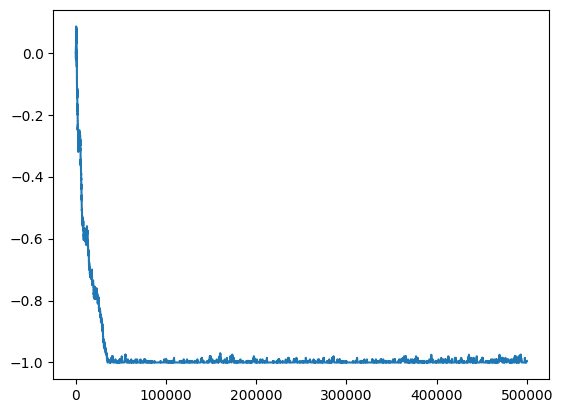

In [9]:
J = 1
T = 1
kB = 1
beta = 1/(kB*T)
M,N=20,20
s = np.random.choice([-1,1],(M,N))

Mag = [s.mean()] #总磁化强度
NMC = 500000
for i in range(NMC):
    m = mcmc(s)
    Mag.append(m)
plt.plot(Mag)

### 二维伊辛模型的精确解
http://www.icfgblog.com/index.php/physics/63.html

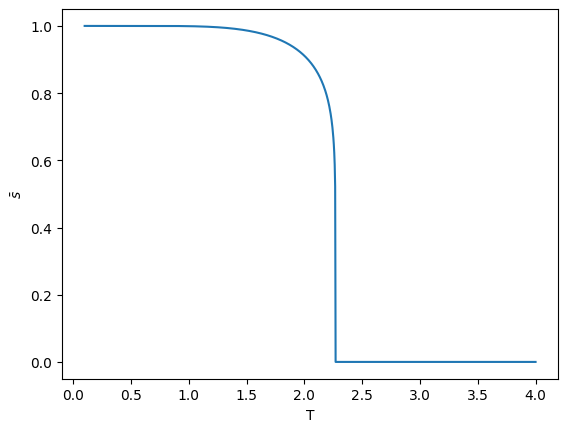

In [10]:
T=np.linspace(0.1,4,1000)
k=1
Tc=2.269
def s(T,Tc=2.269):
    if T>Tc:
        s = 0
    else:
        s = (1-1/np.sinh(2/T)**4)**(0.125)
    return s
sbar=[s(t) for t in T]
plt.plot(T,sbar)
plt.xlabel('T')
_= plt.ylabel('$\\bar{s}$')

	
        
4. 多运行几次程序, 观测磁场符号的变化, 正或负. 描述你看到的现象并给出简单解释.

5. 写第二个程序, 用*vpython*包做系统的动画, 在格点上用两种颜色的球或者方块表示自旋的方向. 设温度$T=1$, 运行程序观测系统行为. 然后分别在温度$T=2$和$T=3$运行两次. 解释3次运行的现象. 当温度升高的时候, 系统有什么变化? 为什么?

In [ ]:
def main(T=1):
    J = 1
    T = 1
    kB = 1
    beta = 1/(kB*T)
    s = np.random.choice([-1,1],(20,20))

    Mag = [s.sum()] #总磁化强度
    (M,N) = s.shape
    NMC = 100000
    for i in range(NMC):
        m = mcmc(s,T=T)
    return m
Temp = np.linspace(0.1,4,100)
MagMean = []
for t in Temp:
    MagMean.append(main(T=t))

In [ ]:
plt.plot(Temp,MagMean,'ro')

### Exercise 10.10 

**函数的全局最小值**

考虑函数 $f(x) = x^2 -
	\cos 4\pi x$, 它看起来如下图:
 
<img src="safx.png" width=300>

显然这个函数的全局最小值在 $x=0$.


1. 写程序用模拟退火算法确认这一点, 假设从$x=2$开始, 蒙特卡洛迁移的模式为 $x\to
x+\delta$, 其中$\delta$来自标准正态分布的随机数. 
采用指数冷却, 挑战起始和终止温度以及指数常数, 直到程序在合理的时间内给出比较好的答案. 用程序画出$x$的值随时间的变化并打印出最后的$x$值. 你会发现用点画结果比用线画更容易理解, 采用类似*plot(x,".")*或类似的语句.
        
        
2. 现在调整程序寻找更复杂函数的极小值 $f(x) = \cos x + \cos \sqrt2x + \cos \sqrt3 x$, $x$的范围是$0<x<50$.

提示: (b)部分的正确答案约为 $x=16$, 但是也有可能是$x=2$或者$x=42$. 在实际应用中，通常能够找到一个合理的解就足够了，不一定是最优解，所以程序有时候找到其它的解也不一定是坏事.

### Exercise 10.11 

**二聚体覆盖问题**

二聚体问题是凝聚态物理中一个被广泛研究的问题，二聚体，即只含有两个原子的聚合物，落在固体表面，原子之间的距离形成类似下图的栅格：
<img src="dimer.png" width=300>
二聚体不能重叠. 问题是整个$L\times L$方框中能装多少个二聚体. 在这个简单的条件下，答案显然是
$\frac{1}{2} L\times L$, 但是假设我们并不知道.  (这个问题的较为复杂的版本是不同的空间网格，或者不同形状的元素，此时最优解不是显而易见，或者完全不清楚.)

1. 写程序用模拟退火算法在$50\times50$的空间网格求解这个问题. 系统的"能量"函数是二聚体数目的负值，所以二聚体达到最大数目的时候取得最小值. 马尔可夫链的步骤如下:

    1. 随机选择网格中两个相邻的位置.
    1. 如果两个位置现在被一个二聚体占用，从网格中移除这个二聚体.
    1. 如果两个网站都是空着的，加一个二聚体.
    1. 否则什么也不做.

用动画展示系统随着模拟的进行随发生的变化.


2. 使用不同的时间常数尝试指数冷却过程. 首次实验可以取 $\tau=10\,000$步. 你会发现冷却过程越快，解越差---越少的网格被填充且空洞越大---但是对越慢的冷却时间，结果相当好的覆盖网格，但是一般也不完美.

### Exercise 10.12 

**地球表面的一个随机点**

假设你想在地球表面选一个随机点. 也就是说，你想选一个经度和纬度以至于地球上每一个点被选取的机会是均等的. 在一个物理上，这等价于在三维空间中选择一个随机向量的方向(这是物理计算中的常见操作).

回顾球坐标系中的$\theta,\phi$，固体角表示为$\sin \theta \> d \theta\> d \phi$, 整个球面的立体角为$4\pi$.  所以我们的点落在某一小元中的概率为
$$
p(\theta,\phi)\> d \theta\> d \phi
  = {\sin \theta \> d \theta\> d \phi\over4\pi}.
$$
我们可以把整个分解成$\theta$部分和$\phi$部分，因而:
$$
p(\theta,\phi)\> d \theta\> d \phi
               = {\sin \theta \> d \theta\over2} \times{ d \phi\over2\pi}
               = p(\theta)\, d \theta\times p(\phi)\, d \phi.
$$

1. $\theta$ 和 $\phi$的变化范围是什么? 验证两个分布 $p(\theta)$ 和 $p(\phi)$都是归一化的---它们在合适区间上的积分为1.

2. 找到从分布$p(\theta)$ 和 $p(\phi)$产生$\theta$ 和 $\phi$的公式. (产生$\phi$很容易，但是产生$\theta$不容易.)

3. 写程序用你找到的公式产生随机的 $\theta$ 和 $\phi$. (提示: 在python中*math*模块中的*acos*返回给定数值的反余弦数值，单位是弧度.)

4. 修改程序产生500个这样的随机点, 将角度转化成$x,y,z$坐标，假设球的半径为1, 然后在三维空间中展示点，采用*visual*包中的小球(例如半径为0.02的小球). 你会看到一个用随机数据点描绘出的三维球体.

### Exercise 10.13 

**扩散限制的聚集模型**

这个练习基于457页的练习10.3. 如果你没有做练习10.3，请选完成它.

在这个练习中你将编写一个计算机程序来产生一个计算物理中最著名的模型，扩散限制的聚集模型, 简称DLA. DLA有不同的版本, 但我们研究的一个版本如下. 你将采用一个正方形网格，中间格点上有一个粒子. 粒子从一个方格到另一个方格进行随机行走直到到达系统边界的网格，此时它“附着”在边界上，并停在那里不动：
<img src="dla.png" width=300>
之后第二个粒子从中心开始随机行走直到它到达边界或者遇到其它粒子. 之后是第三个，第四个.... 每个粒子都从中心出发随机行走直到停在边界或者遇到任何粒子.


1. 复制你练习10.3写的布朗运动的程序. 这将作为你DLA程序的起点. 修改程序在 $101\times101$的格点上进行DLA过程---我们选择奇数边长使得有一个网格刚好处于中心点. 重复在中心放置新的粒子，让它随机行走到边界或者遇到其它粒子.

   你需要确定一些东西. 你怎么存储锚定粒子的位置? 每一步随机行走你都要检查粒子周围的方格，查看是否它们位于系统边界或者已有锚定粒子占据. 你怎么做到这一点? 你需要修改布朗运动练习中的可视化代码来对随机行走粒子和锚定粒子的位置进行可视化. 让你的程序运行一会，观察它的行为.
 
 
2. 为调查速度，修改程序使得它仅显示锚定粒子，不再显示随机行走的粒子. 这样你需要在一个新粒子变成锚定粒子时刷新屏幕. 去掉使动画更平滑的函数*rate*.

   设置程序使得一旦有粒子锚定在中心点时停止运行, 中心点时每个粒子随机行走的起点. 一旦这个点上有了锚定粒子, 将不会再有粒子行走，因为增加的粒子会扎根在它们的起始点.

   运行你的程序查看结果. 如果你比较有耐心，试着将网格改成$201\times201$之后再次运行---产生的图像会更令人印象深刻, 但是需要更长的运行时间.

   一个更好的进步时修改程序使得锚定粒子按年龄不同以不同的阴影或者颜色显示，阴影或是颜色从第一个粒子渐变到最后一个粒子.



3. 如果你对自己很有信心, 尝试下面的内容. 最初版本的DLA与上面描述的版本有一些不同---做起来更复杂. 在最初版本中，在中心点有一个锚定粒子. 下一个粒子从圆周上的一个随机点出发，随机行走直到它附着在中心的粒子上. 之后下一个粒子再从圆周出发随机行走直到遇到其它两个粒子，如此重复. 粒子不再附着再墙上，但是它们不能超出边界.

   不幸的是，这个版本的DLA模拟可能永远完不成---中心点的单个锚定粒子对一个随机行走来说很难找到, 所以对一个粒子的随机行走可能需要很长时间. 但是你可以采用一个小技巧来加速这个过程: 当随机行走的粒子最终到达中心点时, 它将穿过中心周围的任意一个圆上的某个点---圆上的任意一点都一样，所以粒子将闯过任何地方. 但是在这种情况下，我们不需要等粒子穿过这个圆到达中心. 我们直接切入路径，让粒子从圆上的一个随机点出发, 不需要从栅格边界点出发. 这样的模拟DLA过程如下:

    1. 开始时在网格中心设置一个锚点. 定义变量$r$距离任何一个锚定粒子的最远距离. 初始时$r=0$.

    2. 对应每一个增加的粒子, 令其从格点中心的一个同心圆上的一个随机点出发，同心圆半径为$r+1$。 如果选择的随机点不是刚好落在格点上，你可能无法保证正好从圆上出发，这种情况下可以选择圆外最靠近的一个点作为出发点.
    
    3. 进行随机行走直到粒子附着在另外一个粒子上，除非粒子运动到距离中心大于$2r$的地方，扔掉这个粒子，重新在圆上选择一个位置开始新的粒子的随机行走.
  
    4. 每次粒子变成锚定粒子, 计算它到中心的距离, 如果它的距离大于现在的$r$值, 将新的距离赋给$r$.
  
    5. 一旦$r$超过中心点到边界距离的一半，程序停止运行，以防止粒子在格点外面一直行走.

试在$101\times101$的格点上运行你的程序，查看结果.